<h2>Simple Linear Regression</h2>

<h4>Problem Statement: </h4><p>Predict the percentage of an student based on the number of study hours.</p>

<h3>Author: Prachi Chodankar </h3>

<p>Importing required libraries</p>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Reading data

In [3]:
s_data = pd.read_csv("http://bit.ly/w-data")
print("Reading Successful")

Reading Successful


Inspecting first 10 elements from the data

In [4]:
s_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Dimensions of the data

In [5]:
s_data.shape

(25, 2)

Checking co-relation between study hours and marks obtained

In [6]:
s_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<h5>Inference:</h5><p>There is a high positive co-relation between the numbers of hours for which a student studies and that of the marks obtained.</p>

Now let's descibe the data

In [7]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Let us check if our data containes any null values

In [8]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

<h3>Visualizing the data.</h3>

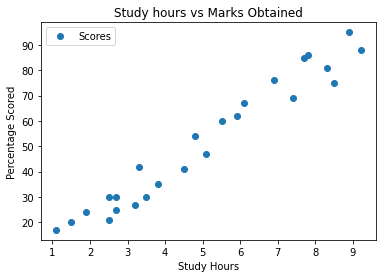

In [10]:
s_data.plot(x="Hours", y="Scores", style="o")
plt.title("Study hours vs Marks Obtained")
plt.xlabel("Study Hours")
plt.ylabel("Percentage Scored")
plt.show()

<h5>Inference:</h5><p>We can clearly see a linear relationship between the study hours and marks obtained. As the number of hours increases, the marks obtained by the student also increase.</p>

<h3>Preparing the data.</h3>

<p>Let us now divide our data into attributes i.e. inputs and labels i.e. outputs</p>

In [ ]:
X= s_data.iloc[:, :-1].values
Y= s_data.iloc[:, 1].values
X

In [18]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

<h3>Now we split the data into training and test sets</h3>

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train, Y_train)

print("Training Complete")

Training Complete


In [26]:
regressor.coef_

array([9.91065648])

In [25]:
regressor.intercept_

2.018160041434662

<p>Let's check the accuracy of our model</p>

In [28]:
regressor.score(X_train, Y_train)*100

95.15510725211553

<h3>Plotting the Regression Line</h3>

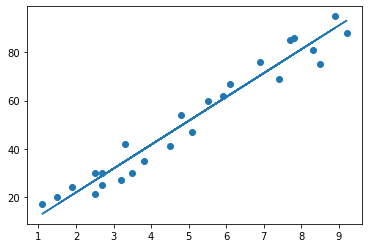

In [30]:
line= regressor.coef_*X+regressor.intercept_

plt.scatter(X,Y)
plt.plot(X, line)
plt.show()

<h3>Making Predictions</h3>

In [31]:
print(X_test)
y_pred= regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


<h3>Comparing actual vs predicted values</h3>

In [34]:
df = pd.DataFrame({"Actual Score": Y_test, "Predicted Score":y_pred})
df

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<p>Now let us predict the score if the student studies for 9.25 hours per day</p>

In [35]:
hours = 9.25
pred = regressor.coef_*hours+regressor.intercept_
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

Number of Hours = 9.25
Predicted Score = 93.69173248737539


<h3>Evaluating the Model</h3>

In [37]:
from sklearn import metrics
print("Mean absolute error : ", metrics.mean_absolute_error(Y_test, y_pred))

Mean absolute error :  4.183859899002982


In [38]:
print("Root Mean square error : ", metrics.mean_squared_error(Y_test, y_pred))

Root Mean square error :  21.598769307217456
